In [15]:
# 导入依赖项
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# 创建一个ndarray数组
arr = np.array([[1, 2], [3, 4]])
arr

array([[1, 2],
       [3, 4]])

In [17]:
# 创建一个矩阵 - 在numpy中创建矩阵需要使用mat函数，该函数需要输入一个二维的ndarray数组
m = np.mat(arr)
m

matrix([[1, 2],
        [3, 4]])

In [18]:
# 矩阵的转置
m.T

matrix([[1, 3],
        [2, 4]])

In [19]:
# 矩阵的乘法
m * m

matrix([[ 7, 10],
        [15, 22]])

In [20]:
# 获取当前方阵的行列式
np.linalg.det(m)

-2.0000000000000004

In [21]:
# 求解方阵的逆矩阵
m.I

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

In [22]:
# 手撕线性回归算法第一步：实现线性回归模型
def linearRegressorModels(dataset):
  
  '''
    构建线性回归模型
  '''
  
  # 1.从数据集中提取特征，构建为一个二维的矩阵
  xMat = np.mat(dataset.iloc[:, : -1].values)
  
  # 2.从数据集中提取标签 - 注意：在取标签的时候，是一个行向量，为了方便后续使用，需要转置为一个列向量
  yMat = np.mat(dataset.iloc[:, -1  ].values).T
  
  # 3.先计算xTx这个n阶方阵
  xTx = xMat.T * xMat
  
  # 对于n阶方阵而言，其方阵的逆矩阵是否存在的充分必要条件是方阵的行列式是否为0
  if np.linalg.det(xTx) == 0:
    print("矩阵的行列式为0，无法求逆，请检查数据集")
    return
  
  return xTx.I * (xMat.T * yMat)


In [23]:
# 测试

# 设置随机种子
randoms = np.random.RandomState(123)

#生成100个0-5之间的随机数
x = 5 * randoms.rand(100)

# 生成真实规律的标签值
y = 2 * x - 5 + randoms.randn(100)

# 构造一个dataframe
x = pd.DataFrame(x)
y = pd.DataFrame(y)

# x还需要添加一个全为1的列，表示截距
col_1 = pd.DataFrame(np.ones([100, 1]))

# 最终按轴一方向，拼接得到最终的数据集
data = pd.concat([col_1, x, y], axis=1)
data.columns = ['inercept', 'features_1', 'target']
data

,inercept,features_1,target
0,1.0,3.482346,4.051805
1,1.0,1.430697,-1.974165
2,1.0,1.134257,-1.581280
3,1.0,2.756574,-0.754204
4,1.0,3.597345,2.375725
...,...,...,...
95,1.0,3.458509,1.558082
96,1.0,0.755637,-4.037368
97,1.0,1.994381,-3.568292
98,1.0,1.204279,-3.140361


In [24]:
# 输入数据集，完成线性回归模型的训练
w_result = linearRegressorModels(data)
w_result

matrix([[-4.83005255],
        [ 1.9461907 ]])

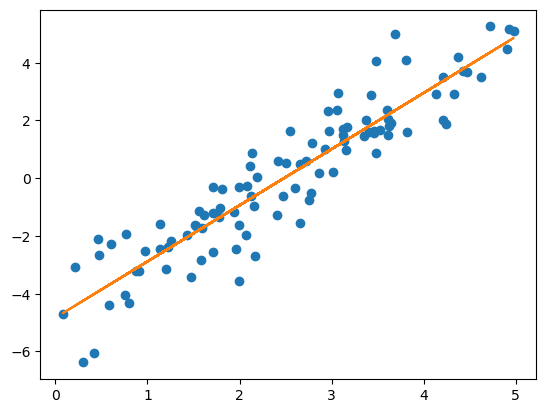

In [28]:
# 可视化

# 先获取预测结果
y_pred = data.iloc[:, :-1].values * w_result # 决策函数的推理

plt.plot(data.iloc[:, 1], data.iloc[:, 2], 'o') # 绘制原始数据样本的散点图
plt.plot(data.iloc[:, 1], y_pred) # 绘制一元线性回归的拟合直线

In [36]:
# 实现SSE残差平方和模型评估指标
def SSE_cal(dataset, regres):
  
  '''
    计算SSE残差平方和模型评估指标
  '''
  
  # 1.先获取标签的观察值
  y = dataset.iloc[:, -1].values
  
  # 2.算出参数列向量w
  w = regres(dataset)
  
  # 3.获取标签的预测结果 - 结果整体转置
  y_pred = (dataset.iloc[:, :-1].values * w).flatten()
  
  return np.power(y_pred - y, 2).sum()  

In [37]:
# 实现判定系数R^2模型评估指标
def r2_Square(dataset, regres):
  
  '''
    计算R^2判断系数
  '''
  
  # 1.先计算SSE残差平方和
  sse = SSE_cal(dataset, regres)
  
  # 2.获取标签的观察值
  y = dataset.iloc[:, -1].values

  # 3.计算观测均值差总平方和
  sst = np.power(y - y.mean(), 2).sum()
  
  return 1 - sse / sst
  
  

In [38]:
r2_Square(data, linearRegressorModels)

0.8562539554691503